In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# description of object type features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,347082,G6,S
freq,1,577,7,4,644


## We try to find relationship between other_feature vs Survived

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Age', 'Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [13]:
train_df[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
train_df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

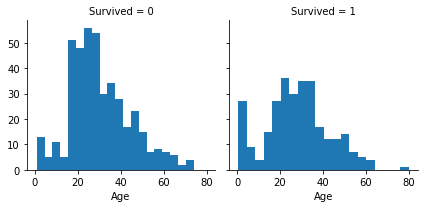

In [18]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

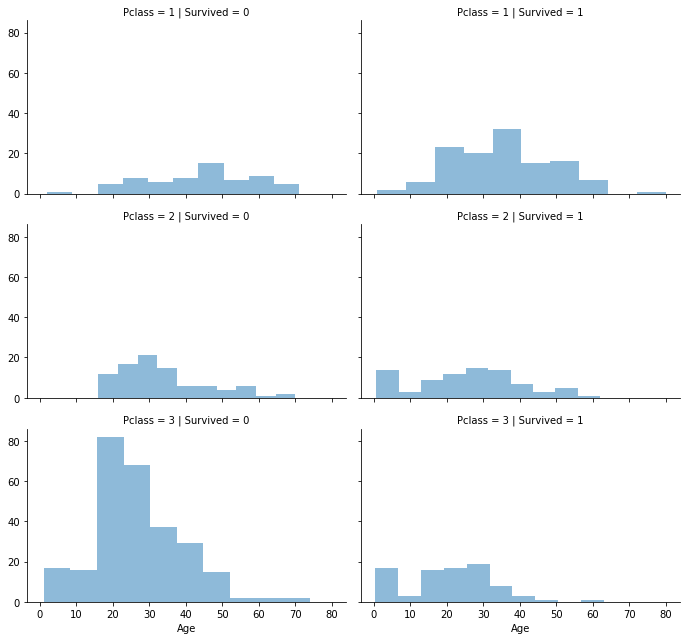

In [19]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5)
grid.add_legend()

C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


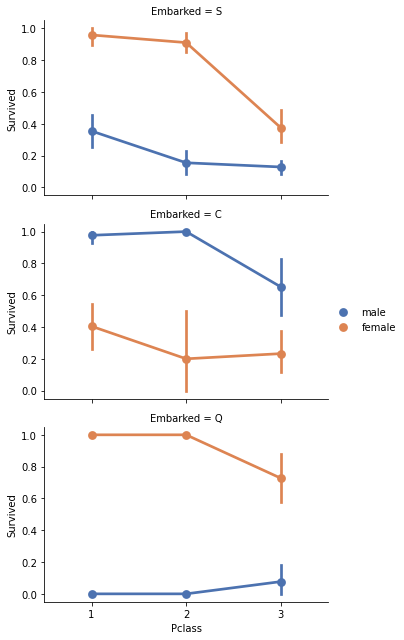

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


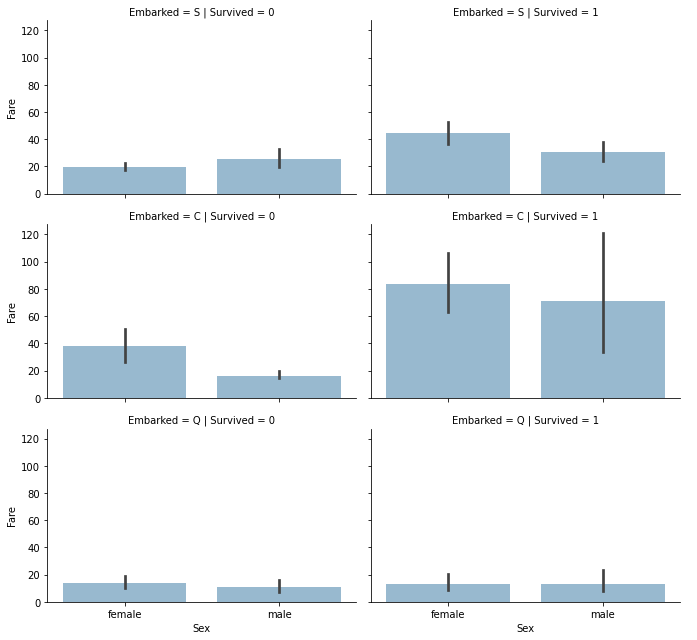

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5)
grid.add_legend()

### we perform operations on both training and testing datasets together to stay consistent.

In [22]:
print('Before deleting shape : ', train_df.shape)

Before deleting shape :  (891, 12)


In [23]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

In [24]:
print('After deleting columns shape : ', train_df.shape)

After deleting columns shape :  (891, 10)


In [25]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [27]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.')

In [28]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [29]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Major', 
                                               'Rev', 'Jonkheer', 'Lady', 'Major', 
                                               'Sir'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')


In [30]:
train_df[['Title', 'Survived']].groupby(['Title'])

In [31]:
train_df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [32]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [33]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

### Title mapping

In [34]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

In [35]:
train_df['Title'] = train_df['Title'].map(title_mapping)

In [36]:
train_df['Title'].isnull().sum()

0

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [38]:
train_df.drop(['Name'], axis=1, inplace=True)

In [39]:
train_df.shape

(891, 10)

In [40]:
train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


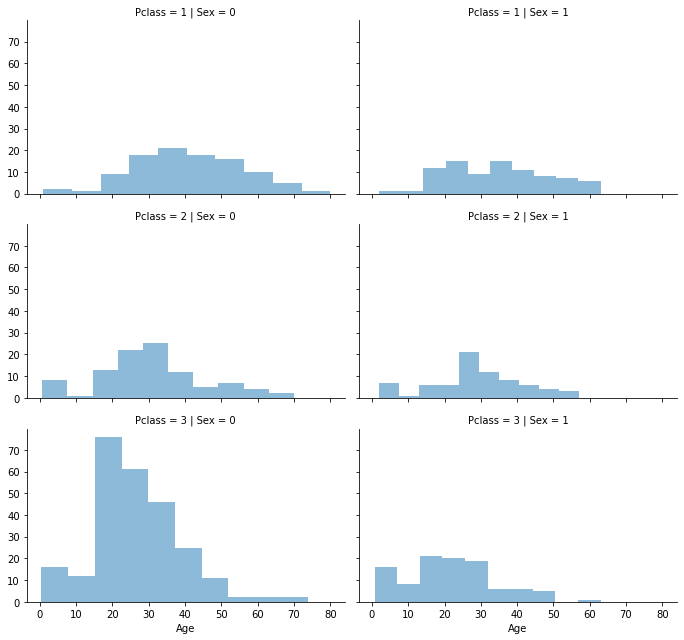

In [42]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5)


In [43]:
ages = np.zeros((2,3))
ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [44]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [45]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
for i in range(2):
    for j in range(3):
        age = train_df['Age'].dropna()
        guess = age.median()
        ages[i, j ] = int(guess / 0.5 + 0.5) * 0.5
        
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [47]:
train_df.Age.isnull().sum()

177

In [48]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [49]:
train_df.Age.isnull().sum()

0

In [50]:
train_df['Age'] = train_df['Age'].astype(int)

In [51]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Age']]

,AgeBand,Age
0,"(16.0, 32.0]",22
1,"(32.0, 48.0]",38
2,"(16.0, 32.0]",26
3,"(32.0, 48.0]",35
4,"(32.0, 48.0]",35
...,...,...
886,"(16.0, 32.0]",27
887,"(16.0, 32.0]",19
888,"(16.0, 32.0]",28
889,"(16.0, 32.0]",26


In [52]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [53]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [54]:
train_df.drop(['AgeBand'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7.2500,S,1
1,2,1,1,1,38,1,0,71.2833,C,3
2,3,1,3,1,26,0,0,7.9250,S,2
3,4,1,1,1,35,1,0,53.1000,S,3
4,5,0,3,0,35,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,S,5
887,888,1,1,1,19,0,0,30.0000,S,2
888,889,0,3,1,28,1,2,23.4500,S,2
889,890,1,1,0,26,0,0,30.0000,C,1


In [55]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [56]:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize']==1, 'IsAlone'] = 1

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,1,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]",2,0
1,2,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]",2,0
2,3,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]",1,1
3,4,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]",2,0
4,5,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]",1,1


In [58]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [59]:
train_df = train_df.drop(['Parch', 'FamilySize', 'SibSp'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,1,0,3,0,22,7.2500,S,1,"(16.0, 32.0]",0
1,2,1,1,1,38,71.2833,C,3,"(32.0, 48.0]",0
2,3,1,3,1,26,7.9250,S,2,"(16.0, 32.0]",1
3,4,1,1,1,35,53.1000,S,3,"(32.0, 48.0]",0
4,5,0,3,0,35,8.0500,S,1,"(32.0, 48.0]",1


In [60]:
train_df = train_df.drop(['AgeBand'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22,7.2500,S,1,0
1,2,1,1,1,38,71.2833,C,3,0
2,3,1,3,1,26,7.9250,S,2,1
3,4,1,1,1,35,53.1000,S,3,0
4,5,0,3,0,35,8.0500,S,1,1


In [61]:
train_df['Embarked'].isnull().sum()

2

In [62]:
freq = train_df['Embarked'].dropna().mode()[0]
freq

'S'

In [63]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq)

In [64]:
train_df['Embarked'].isnull().sum()

0

In [65]:
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [66]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [67]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22,7.2500,0,1,0
1,2,1,1,1,38,71.2833,2,3,0
2,3,1,3,1,26,7.9250,0,2,1
3,4,1,1,1,35,53.1000,0,3,0
4,5,0,3,0,35,8.0500,0,1,1


In [68]:
train_df['Fare'].isna().sum()

0

In [69]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [70]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,22,7.2500,0,1,0,"(-0.001, 7.91]"
1,2,1,1,1,38,71.2833,2,3,0,"(31.0, 512.329]"
2,3,1,3,1,26,7.9250,0,2,1,"(7.91, 14.454]"
3,4,1,1,1,35,53.1000,0,3,0,"(31.0, 512.329]"
4,5,0,3,0,35,8.0500,0,1,1,"(7.91, 14.454]"


In [71]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

In [72]:
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,22,0,0,1,0,"(-0.001, 7.91]"
1,2,1,1,1,38,3,2,3,0,"(31.0, 512.329]"
2,3,1,3,1,26,1,0,2,1,"(7.91, 14.454]"
3,4,1,1,1,35,3,0,3,0,"(31.0, 512.329]"
4,5,0,3,0,35,1,0,1,1,"(7.91, 14.454]"
5,6,0,3,0,28,1,1,1,1,"(7.91, 14.454]"
6,7,0,1,0,54,3,0,1,1,"(31.0, 512.329]"
7,8,0,3,0,2,2,0,4,0,"(14.454, 31.0]"
8,9,1,3,1,27,1,0,3,0,"(7.91, 14.454]"
9,10,1,2,1,14,2,2,3,0,"(14.454, 31.0]"


In [73]:
X_train = train_df.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_df['Survived']

In [74]:
X_train.shape, y_train.shape

((891, 8), (891,))

In [75]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int32
Age               int32
Fare              int32
Embarked          int32
Title             int64
IsAlone           int64
FareBand       category
dtype: object

In [76]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,22,0,0,1,0,"(-0.001, 7.91]"
1,2,1,1,1,38,3,2,3,0,"(31.0, 512.329]"
2,3,1,3,1,26,1,0,2,1,"(7.91, 14.454]"
3,4,1,1,1,35,3,0,3,0,"(31.0, 512.329]"
4,5,0,3,0,35,1,0,1,1,"(7.91, 14.454]"


In [77]:
train_df = train_df.drop(['FareBand'], axis=1)

In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22,0,0,1,0
1,2,1,1,1,38,3,2,3,0
2,3,1,3,1,26,1,0,2,1
3,4,1,1,1,35,3,0,3,0
4,5,0,3,0,35,1,0,1,1


In [81]:
train_df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int32
Age            int32
Fare           int32
Embarked       int32
Title          int64
IsAlone        int64
dtype: object

In [82]:
train_df.drop('PassengerId', axis=1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,0,0,1,0
1,1,1,1,38,3,2,3,0
2,1,3,1,26,1,0,2,1
3,1,1,1,35,3,0,3,0
4,0,3,0,35,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27,1,0,5,1
887,1,1,1,19,2,0,2,1
888,0,3,1,28,2,0,2,0
889,1,1,0,26,2,2,1,1


In [84]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

In [85]:
X_train.shape, Y_train.shape

((891, 8), (891,))

In [86]:
X_train.dtypes

PassengerId    int64
Pclass         int64
Sex            int32
Age            int32
Fare           int32
Embarked       int32
Title          int64
IsAlone        int64
dtype: object

In [89]:
X_train.drop('PassengerId', axis=1 , inplace=True)

In [90]:
X_train.shape

(891, 7)

In [91]:
X_train.dtypes

Pclass      int64
Sex         int32
Age         int32
Fare        int32
Embarked    int32
Title       int64
IsAlone     int64
dtype: object

## Logistic Regression

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = logreg.score(X_train, Y_train) * 100
acc_log

81.25701459034792

#### check Correlation

In [103]:
coeff = pd.DataFrame(train_df.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])
coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.230718
5,Embarked,0.408151
4,Fare,0.292214
6,Title,0.214968
2,Sex,-0.031699
3,Age,-0.081529
0,Survived,-1.153966
7,IsAlone,NaN


## SVC

In [105]:
svc = SVC()
svc.fit(X_train, y_train)
accuracy = svc.score(X_train, y_train) * 100
accuracy

74.97194163860831

## k nearest neighbor

In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831

In [107]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831

In [108]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831

In [109]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831

In [110]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831

In [113]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
acuracy = knn.score(X_train, y_train)*100
accuracy

74.97194163860831